In [11]:
#data explorer
import numpy as np
import pandas as pd
import requests
import json
from pprint import pprint
import matplotlib.pyplot as plt

u = "https://banks.data.fdic.gov/api/summary?filters=STNAME%3A%22{}%22%20AND%20YEAR%3A{}&fields=STNAME%2CYEAR%2CLNAUTO%2CLNCON%2CLNCONOTH%2CLNCRCD%2CLNRE&sort_by=YEAR&sort_order=DESC&limit=100&offset=0&format=json&download=false&filename=data_file"
#url = "https://banks.data.fdic.gov/api/summary?filters=STNAME%3A%22{}%22ANDYEAR%3A[1988]&fields=STNAME%2CYEAR%2CINTINC%2CEINTEXP%2CNIM%2CNONII%2CNONIX%2CELNATR%2CITAXR%2CIGLSEC%2CITAX%2CEXTRA%2CNETINC&sort_by=YEAR&sort_order=DESC&limit=10&offset=0&format=json&download=false&filename=data_file"
#url = "https://banks.data.fdic.gov/api/summary?filters=STNAME%3A%22{}%22&fields=STNAME%2CYEAR%2CLNAUTO%2CLNCON%2CLNCONOTH%2CLNCRCD%2CLNRE&sort_by=YEAR&sort_order=DESC&limit=100&offset=0&format=json&download=false&filename=data_file"
summary_by_year = pd.DataFrame()
yr_list = [1990,1991,1992]
url_dic = {}
res = []
res_dict = {}

In [2]:
# List of the states
state_list = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

test_list = ["Alabama","Alaska","Arizona"]

year_list = []
for i in range(25):
    year_list.append(1987 + i)
'''
# Loop to add each state's data to dictionary 
for state in state_list:
    url_state = url.format(state)
    summary_by_year.update({state: requests.get(url_state).json()})
'''
for state in test_list:
    url_state = u.format(state)
    xc = requests.get(url_state).json()


In [16]:
for state in test_list:
    url_state = u.format(state)
#xc['data']
#xv = pd.DataFrame(xc['data'])
#xv
#summary_by_year['Alabama']['data'][0]
#pprint(summary_by_year['Alabama']['data'][0]['data'])

IndexError: tuple index out of range

In [68]:
tick_c = 0
for state in test_list:
    for yr in year_list:
        url_state = u.format(state,yr)
        tdf = requests.get(url_state)
        res.append(tdf)
        res_dict.update({tick_c:tdf.json()})
        tick_c += 1
        #summary_by_year[yr] = pd.DataFrame(tdf['data'])
        #url_dic.update({F"{state},{yr}":url_state})

In [71]:
res_dict
for k in res_dict.items(): print(k)
#url_dic

('Alabama', {'meta': {'total': 2, 'parameters': {'filters': 'STNAME:"Alabama" AND YEAR:2011', 'fields': 'STNAME,YEAR,LNAUTO,LNCON,LNCONOTH,LNCRCD,LNRE', 'limit': '100', 'offset': '0'}, 'index': {'name': 'historical_1547598112504', 'createTimestamp': '2019-01-16T00:21:52Z'}}, 'data': [{'data': {'LNCON': 21507, 'YEAR': '2011', 'LNRE': 667625, 'LNCRCD': 0, 'STNAME': 'Alabama'}}, {'data': {'LNCONOTH': 2050538, 'LNCON': 7643078, 'YEAR': '2011', 'LNRE': 92463798, 'LNCRCD': 2157596, 'STNAME': 'Alabama', 'LNAUTO': 3434944}}], 'totals': {'count': 2}})
('Alaska', {'meta': {'total': 2, 'parameters': {'filters': 'STNAME:"Alaska" AND YEAR:2011', 'fields': 'STNAME,YEAR,LNAUTO,LNCON,LNCONOTH,LNCRCD,LNRE', 'limit': '100', 'offset': '0'}, 'index': {'name': 'historical_1547598112504', 'createTimestamp': '2019-01-16T00:21:52Z'}}, 'data': [{'data': {'LNCONOTH': 21178, 'LNCON': 35123, 'YEAR': '2011', 'LNRE': 1664322, 'LNCRCD': 7559, 'STNAME': 'Alaska', 'LNAUTO': 6386}}, {'data': {'LNCON': 8152, 'YEAR': '20

In [70]:
columns = list(summary_by_year['Alabama']['data'][0]['data'].keys())

KeyError: 'data'

In [12]:
debt_data = "../raw-data/fdicdata.csv"
debt = pd.read_csv(debt_data)


In [13]:
debt = debt.fillna(0)
debt.groupby('Year').sum()

,Unnamed: 0,Auto Loans,Total Loans,Other Loans,Credit Cards,Real Estate,Total Past Due
Year,,,,,,,
1987,24,0.0,347986020,245471027,102514993,598699606,40563426
1988,23,0.0,374548881,257762209,116786672,673296777,41180485
1989,22,0.0,397857791,266883392,130974399,759284022,48058033
1990,21,0.0,399324743,266413460,132911283,825891247,58032820
1991,20,0.0,388996614,250462590,138534024,847976872,52539038
1992,19,0.0,383083172,247248620,135834552,864346330,43288016
1993,18,0.0,417290491,263489524,153800967,917591402,35896675
1994,17,0.0,484162516,296457862,187704654,990449769,34451707
1995,16,0.0,532640233,314878416,217761817,1072504445,41434525


In [14]:
debt['Other Loans'] = debt['Other Loans'] + debt['Auto Loans']
debt['Total Loans'] = debt['Total Loans'] + debt['Real Estate']
debt_clean = debt.drop(columns = ['Unnamed: 0','Auto Loans', 'State'])
debt_clean = debt_clean.sort_values('Year', ascending=True).reset_index().drop(columns = 'index')
debt_clean.to_csv('../raw-data/debt_clean.csv')

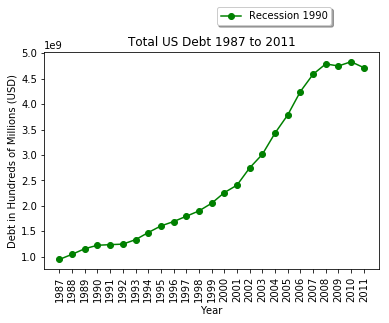

In [18]:
yr_tick = debt_clean['Year']
debt_clean.groupby('Year').sum().reset_index()
plt.plot(debt_clean['Year'], debt_clean['Total Loans'],
        color='green', marker='o', linestyle='solid')
plt.legend(['Recession 1990'], loc='lower left', 
           bbox_to_anchor=[0.5, 1.1], 
           fancybox=True, shadow=True)
plt.xticks(ticks = yr_tick, rotation='vertical')
plt.title('Total US Debt 1987 to 2011')
plt.xlabel('Year')
plt.ylabel('Debt in Hundreds of Millions (USD)')
plt.savefig('../graphs/tot_debt.png')
plt.show()

In [20]:
# Creates dataframes based around each recession period
first_rec = debt_clean[(debt_clean['Year'] == 1987) | (debt_clean['Year'] == 1988) | (debt_clean['Year'] == 1989) | (debt_clean['Year'] == 1990) | 
          (debt_clean['Year'] == 1991) | (debt_clean['Year'] == 1992) | (debt_clean['Year'] == 1993)]
second_rec = debt_clean[(debt_clean['Year'] == 1997) | (debt_clean['Year'] == 1998) | (debt_clean['Year'] == 1999) | (debt_clean['Year'] == 2000) | 
          (debt_clean['Year'] == 2001) | (debt_clean['Year'] == 2002) | (debt_clean['Year'] == 2003)]
third_rec = debt_clean[(debt_clean['Year'] == 2005) | (debt_clean['Year'] == 2006) | (debt_clean['Year'] == 2007) | (debt_clean['Year'] == 2008) | 
          (debt_clean['Year'] == 2009) | (debt_clean['Year'] == 2010) | (debt_clean['Year'] == 2011)]

# Sums the data for each recession dataframe 
first_rec = first_rec.groupby('Year').sum().reset_index()
second_rec = second_rec.groupby('Year').sum().reset_index()
third_rec = third_rec.groupby('Year').sum().reset_index()

# Caption to denote what year means when plotting each recession
caption_text = '3 Years before and after peak recession year included'

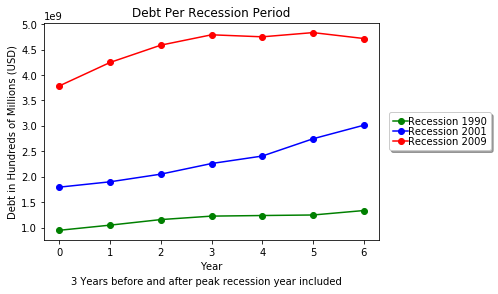

In [21]:
# Plots the total amount of loan debt for each respective recession period 
plt.plot(first_rec['Total Loans'],
        color='green', marker='o', linestyle='solid')
plt.plot(second_rec['Total Loans'],
        color='blue', marker='o', linestyle='solid')
plt.plot(third_rec['Total Loans'],
        color='red', marker='o', linestyle='solid')
plt.legend(['Recession 1990', 'Recession 2001', 'Recession 2009'], loc='right', 
           bbox_to_anchor=[1.35, .5], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.title('Debt Per Recession Period')
plt.xlabel('Year')
plt.ylabel('Debt in Hundreds of Millions (USD)')
plt.figtext(0.5, -0.03, caption_text, wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig('../graphs/debt_per_rec.png')
plt.show()

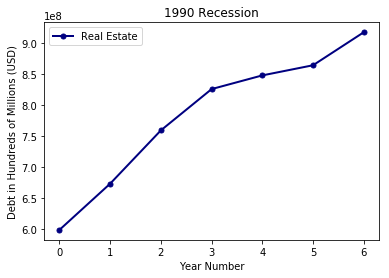

In [25]:
real_estate_only = ['Year', 'Total Loans' ,'Other Loans', 'Credit Cards',  'Total Past Due']
first_rec_line_real = first_rec.drop(columns = real_estate_only)
ax = first_rec_line_real.plot(lw=2, colormap='jet', marker='.', markersize=10, title='1990 Recession')
ax.set_xlabel("Year Number")
ax.set_ylabel("Debt in Hundreds of Millions (USD)")
plt.savefig('../graphs/real_estate_1990.png')

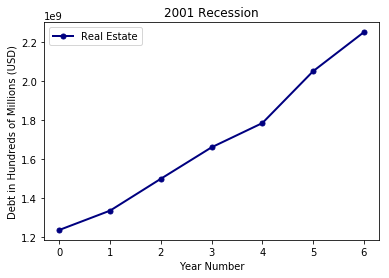

In [26]:
second_rec_line_real = second_rec.drop(columns = real_estate_only)
ax2 = second_rec_line_real.plot(lw=2, colormap='jet', marker='.', markersize=10, title='2001 Recession')
ax2.set_xlabel("Year Number")
ax2.set_ylabel("Debt in Hundreds of Millions (USD)")
plt.savefig('../graphs/real_estate_2001.png')

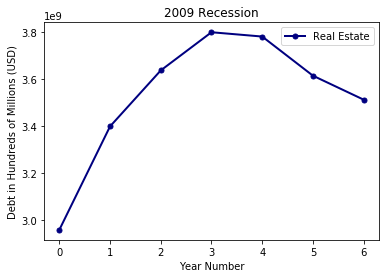

In [27]:
third_rec_line_real = third_rec.drop(columns = real_estate_only)
ax3 = third_rec_line_real.plot(lw=2, colormap='jet', marker='.', markersize=10, title='2009 Recession')
ax3.set_xlabel("Year Number")
ax3.set_ylabel("Debt in Hundreds of Millions (USD)")
plt.savefig('../graphs/real_estate_2011.png')
#debt_clean_first_rec_tot.plot(x='Year', y='Total Loans', kind = 'line')
#debt_clean_second_rec_tot.plot(x='Year', y='Total Loans')
#debt_clean_third_rec_tot.plot(x='Year', y='Total Loans')

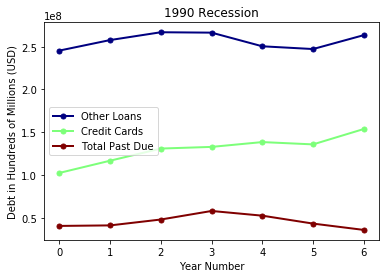

In [28]:
all_but_real_estate = ['Year', 'Total Loans', 'Real Estate']
first_rec_line_else = first_rec.drop(columns = all_but_real_estate)
ax = first_rec_line_else.plot(lw=2, colormap='jet', marker='.', markersize=10, title='1990 Recession')
ax.set_xlabel("Year Number")
ax.set_ylabel("Debt in Hundreds of Millions (USD)")
plt.savefig('../graphs/rec_debt_1990.png')

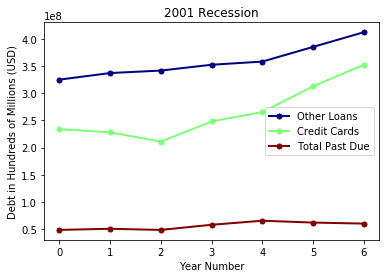

In [29]:
second_rec_line_else = second_rec.drop(columns = all_but_real_estate)
ax2 = second_rec_line_else.plot(lw=2, colormap='jet', marker='.', markersize=10, title='2001 Recession')
ax2.set_xlabel("Year Number")
ax2.set_ylabel("Debt in Hundreds of Millions (USD)")
plt.savefig('../graphs/rec_debt_2000.png')

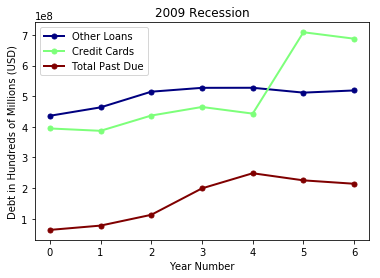

In [30]:
third_rec_line_else = third_rec.drop(columns = all_but_real_estate)
ax3 = third_rec_line_else.plot(lw=2, colormap='jet', marker='.', markersize=10, title='2009 Recession')
ax3.set_xlabel("Year Number")
ax3.set_ylabel("Debt in Hundreds of Millions (USD)")
plt.savefig('../graphs/rec_debt_2011.png')
#debt_clean_first_rec_tot.plot(x='Year', y='Total Loans', kind = 'line')
#debt_clean_second_rec_tot.plot(x='Year', y='Total Loans')
#debt_clean_third_rec_tot.plot(x='Year', y='Total Loans')

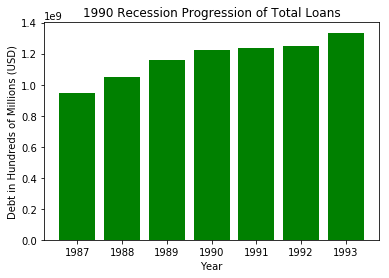

In [31]:
plt.bar(first_rec['Year'],first_rec['Total Loans'], tick_label = first_rec['Year'], color = 'green')
plt.title('1990 Recession Progression of Total Loans')
plt.xlabel('Year')
plt.ylabel("Debt in Hundreds of Millions (USD)")
#bx.set_xlabel('Year')
#bx.set_ylabel('Debt in Thousands (USD)')
plt.savefig('../graphs/rec_debt_bar_1990.png')
plt.show()

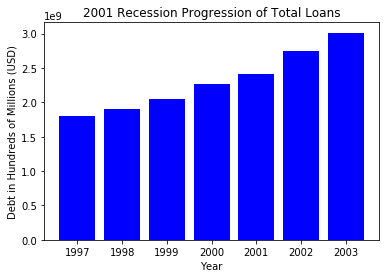

In [32]:
plt.bar(second_rec['Year'],second_rec['Total Loans'], tick_label = second_rec['Year'], color = 'blue')
plt.title('2001 Recession Progression of Total Loans')
plt.xlabel('Year')
plt.ylabel("Debt in Hundreds of Millions (USD)")
plt.savefig('../graphs/rec_debt_bar_2001.png')
plt.show()

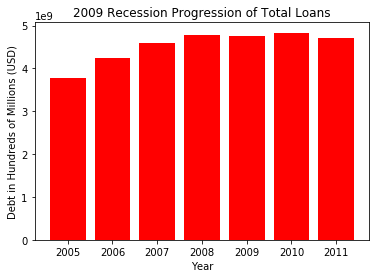

In [33]:
plt.bar(third_rec['Year'],third_rec['Total Loans'], tick_label = third_rec['Year'], color = 'red')
plt.title('2009 Recession Progression of Total Loans')
plt.xlabel('Year')
plt.ylabel("Debt in Hundreds of Millions (USD)")
plt.savefig('../graphs/rec_debt_bar_2011.png')
plt.show()

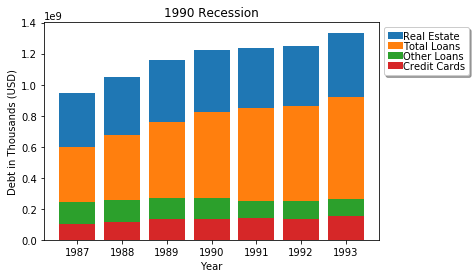

In [34]:
plt.bar(first_rec['Year'],first_rec['Total Loans'])
plt.bar(first_rec['Year'],first_rec['Real Estate'])
plt.bar(first_rec['Year'],first_rec['Other Loans'])
plt.bar(first_rec['Year'],first_rec['Credit Cards'])
#plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
plt.legend(['Real Estate', 'Total Loans', 'Other Loans', 'Credit Cards'], loc='best', 
           bbox_to_anchor=[1, 1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.title('1990 Recession')
plt.xlabel('Year')
plt.ylabel('Debt in Thousands (USD)')
plt.savefig('../graphs/stacked_debt_bar_1990.png')
plt.show()

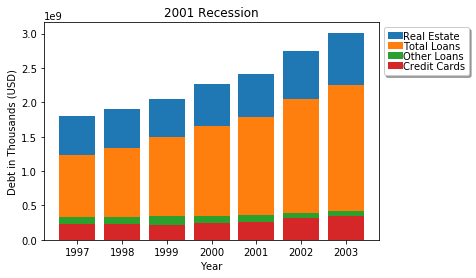

In [35]:
plt.bar(second_rec['Year'],second_rec['Total Loans'])
plt.bar(second_rec['Year'],second_rec['Real Estate'])
plt.bar(second_rec['Year'],second_rec['Other Loans'])
plt.bar(second_rec['Year'],second_rec['Credit Cards'])
#plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
plt.legend(['Real Estate', 'Total Loans', 'Other Loans', 'Credit Cards'], loc='best', 
           bbox_to_anchor=[1, 1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.title('2001 Recession')
plt.xlabel('Year')
plt.ylabel('Debt in Thousands (USD)')
plt.savefig('../graphs/stacked_debt_bar_2001.png')
plt.show()

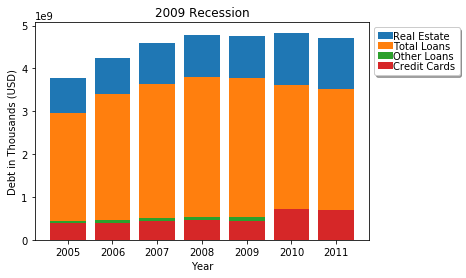

In [36]:
plt.bar(third_rec['Year'],third_rec['Total Loans'])
plt.bar(third_rec['Year'],third_rec['Real Estate'])
plt.bar(third_rec['Year'],third_rec['Other Loans'])
plt.bar(third_rec['Year'],third_rec['Credit Cards'])
#plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
plt.legend(['Real Estate', 'Total Loans', 'Other Loans', 'Credit Cards'], loc='best', 
           bbox_to_anchor=[1, 1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.title('2009 Recession')
plt.xlabel('Year')
plt.ylabel('Debt in Thousands (USD)')
plt.savefig('../graphs/stacked_debt_bar_2011.png')
plt.show()

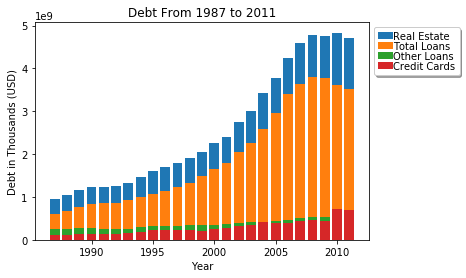

In [37]:
plt.bar(debt_clean['Year'],debt_clean['Total Loans'])
plt.bar(debt_clean['Year'],debt_clean['Real Estate'])
plt.bar(debt_clean['Year'],debt_clean['Other Loans'])
plt.bar(debt_clean['Year'],debt_clean['Credit Cards'])
#plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
plt.legend(['Real Estate', 'Total Loans', 'Other Loans', 'Credit Cards'], loc='best', 
           bbox_to_anchor=[1, 1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.title('Debt From 1987 to 2011')
plt.xlabel('Year')
plt.ylabel('Debt in Thousands (USD)')
plt.savefig('../graphs/stacked_debt_bar.png')
plt.show()

In [29]:
'''
debt_clean_all_years_test = debt_clean_all_years
per = debt_clean_all_years['Total Loans']
pers = []
for i in range(1,len(per)):
    delta = ((per[i]/per[i-1]) -1) * 100
    pers.append(delta)
'''

"\ndebt_clean_all_years_test = debt_clean_all_years\nper = debt_clean_all_years['Total Loans']\npers = []\nfor i in range(1,len(per)):\n    delta = ((per[i]/per[i-1]) -1) * 100\n    pers.append(delta)\n"

In [30]:
#debt_clean = debt_clean.drop(columns = ['State'])
#debt_clean = debt_clean.sort_values('Year')
debt_clean

,Total Loans,Other Loans,Credit Cards,Real Estate,Total Past Due,Year
0,946685626,245471027.0,102514993,598699606,40563426,1987
1,1047845658,257762209.0,116786672,673296777,41180485,1988
2,1157141813,266883392.0,130974399,759284022,48058033,1989
3,1225215990,266413460.0,132911283,825891247,58032820,1990
4,1236973486,250462590.0,138534024,847976872,52539038,1991
5,1247429502,247248620.0,135834552,864346330,43288016,1992
6,1334881893,263489524.0,153800967,917591402,35896675,1993
7,1474612285,296457862.0,187704654,990449769,34451707,1994
8,1605144678,314878416.0,217761817,1072504445,41434525,1995
9,1690880054,325319914.0,234598883,1130961257,47557076,1996


In [40]:
store_col = list(debt_clean.keys())
store_col.pop(-1)
debt_clean['Year']

0     1987
1     1988
2     1989
3     1990
4     1991
5     1992
6     1993
7     1994
8     1995
9     1996
10    1997
11    1998
12    1999
13    2000
14    2001
15    2002
16    2003
17    2004
18    2005
19    2006
20    2007
21    2008
22    2009
23    2010
24    2011
Name: Year, dtype: int64

In [42]:
#print(store_col)
a_df = pd.DataFrame()
year_order = []
for head in store_col:
    if head == 'Year':
        a_df[head] = debt_clean[head]
    else:
        percentage = debt_clean[head]
        percs = []
        for i in range(1,len(percentage)):
            delta = 0
            delta = ((percentage[i] - percentage[i-1])/percentage[i]) * 100
            percs.append(delta)
        a_df[head] = percs
        a_df['Year'] = debt_clean['Year'] + 1
a_df

#pd.concat([pd.DataFrame[j], columns = [head] for j in range(len(store))], ignore_index=True)

#pd.concat([pd.DataFrame([i], columns=['A']) for i in range(5)], ignore_index=True)

,Total Loans,Year,Other Loans,Credit Cards,Real Estate,Total Past Due
0,9.654097,1988,4.768419,12.220298,11.079389,1.498426
1,9.445355,1989,3.417666,10.832443,11.324780,14.310923
2,5.556096,1990,-0.176392,1.457276,8.064891,17.188182
3,0.950505,1991,-6.368564,4.058744,2.604508,-10.456571
4,0.838205,1992,-1.299894,-1.987324,1.893854,-21.370862
5,6.551320,1993,6.163776,11.681601,5.802700,-20.590601
6,9.475738,1994,11.120750,18.062252,7.356089,-4.194184
7,8.132126,1995,5.850053,13.802770,7.650754,16.852656
8,5.070459,1996,3.209609,7.176959,5.168772,12.874112
9,5.810202,1997,-0.154298,-0.327946,8.537729,2.153867


In [41]:
def percentage_delta(header):
    empty_df = pd.DataFrame()
    percen = []
    for head in store_col:
        percentages = debt_clean[head]
        percen = []
        for i in range(1,len(percentages)):
            delta = 0
            delta = ((percentages[i] - percentages[i-1])/percentages[i]) * 100
            percen.append(delta)
        empty_df[head] = percen
    empty_df['Year'] = debt_clean['Year'] + 1
    
    return empty_df

In [42]:
percentage_delta_df = percentage_delta(store_col)
percentage_delta_df.to_csv('../raw-data/debt_percenta_delta.csv')
percentage_delta_df.sort_values('Year')
axc = percentage_delta_df['Year']

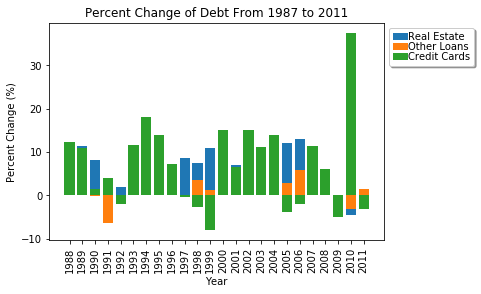

In [43]:
plt.bar(percentage_delta_df['Year'],percentage_delta_df['Real Estate'])
#plt.bar(percentage_delta_df['Year'],percentage_delta_df['Total Loans'])
plt.bar(percentage_delta_df['Year'],percentage_delta_df['Other Loans'])
plt.bar(percentage_delta_df['Year'],percentage_delta_df['Credit Cards'])
#plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
plt.legend(['Real Estate', 'Other Loans', 'Credit Cards'], loc='best', 
           bbox_to_anchor=[1, 1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.xticks(ticks = axc, rotation='vertical')
plt.title('Percent Change of Debt From 1987 to 2011')
plt.xlabel('Year')
plt.ylabel('Percent Change (%)')
plt.savefig('../graphs/stacked_per_debt_bar.png')
plt.show()

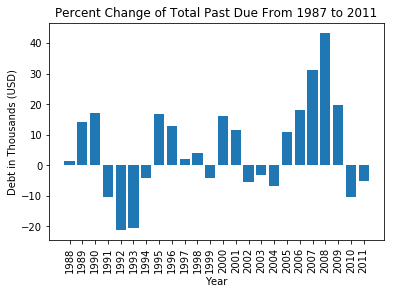

In [44]:
plt.bar(percentage_delta_df['Year'],percentage_delta_df['Total Past Due'])
#plt.bar(debt_clean_second_rec_tot['Year'],debt_clean_third_rec_tot['Real Estate'])
plt.xticks(ticks = axc, rotation='vertical')
plt.title('Percent Change of Total Past Due From 1987 to 2011')
plt.xlabel('Year')
plt.ylabel('Debt in Thousands (USD)')
plt.savefig('../graphs/stacked_per_past_due_bar.png')
plt.show()

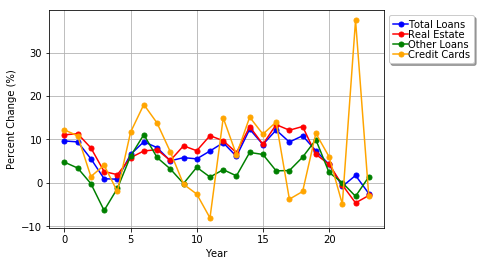

In [53]:
plt.plot(percentage_delta_df['Total Loans'], color='blue', marker='o', markersize=5, linestyle='solid')
plt.plot(percentage_delta_df['Real Estate'], color='red', marker='o', markersize=5, linestyle='solid')
plt.plot(percentage_delta_df['Other Loans'], color='green', marker='o', markersize=5, linestyle='solid')
plt.plot(percentage_delta_df['Credit Cards'], color='orange', marker='o', markersize=5, linestyle='solid')
plt.legend(['Total Loans', 'Real Estate', 'Other Loans', 'Credit Cards'], loc='best', 
           bbox_to_anchor=[1, 1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Percent Change (%)')
plt.savefig('../graphs/per_debt_line.png')
plt.show()

In [54]:
first_rec_per = percentage_delta_df[(percentage_delta_df['Year'] == 1987) | (percentage_delta_df['Year'] == 1988) | 
                                               (percentage_delta_df['Year'] == 1989) | (percentage_delta_df['Year'] == 1990) | 
                                               (percentage_delta_df['Year'] == 1991) | (percentage_delta_df['Year'] == 1992) | 
                                               (percentage_delta_df['Year'] == 1993)]

second_rec_per = percentage_delta_df[(percentage_delta_df['Year'] == 1997) | (percentage_delta_df['Year'] == 1998) | 
                                                (percentage_delta_df['Year'] == 1999) | (percentage_delta_df['Year'] == 2000) | 
                                                (percentage_delta_df['Year'] == 2001) | (percentage_delta_df['Year'] == 2002) | 
                                                (percentage_delta_df['Year'] == 2003)]

third_rec_per = percentage_delta_df[(percentage_delta_df['Year'] == 2005) | (percentage_delta_df['Year'] == 2006) | 
                                               (percentage_delta_df['Year'] == 2007) | (percentage_delta_df['Year'] == 2008) | 
                                               (percentage_delta_df['Year'] == 2009) | (percentage_delta_df['Year'] == 2010) | 
                                               (percentage_delta_df['Year'] == 2011)]

In [55]:
col_names = list(percentage_delta_df.keys())
col_names.pop(-1)

'Year'

In [57]:
def per_bar_plot_90(column_name):
    plt.bar(first_rec_per['Year'],first_rec_per[column_name])
    #plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
    plt.title(f'1990 Recession Percent Change of {column_name}')
    plt.xlabel('Year')
    plt.ylabel('Percent Change %')
    plt.savefig(f'../graphs/per_delta_bar_{column_name}.png')
    plt.show()

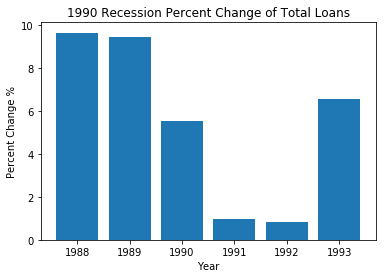

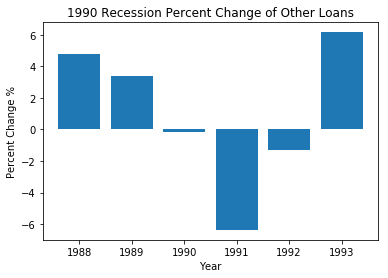

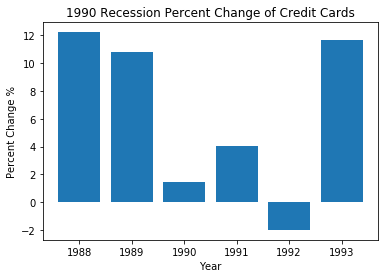

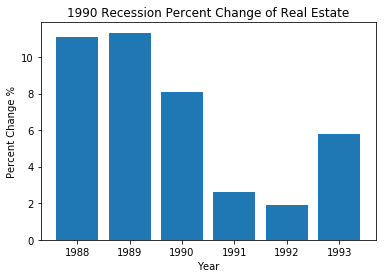

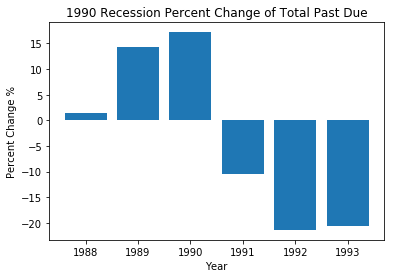

In [58]:
# Loops over function to generate line graph for each plot
for col, val in enumerate(col_names):
    per_bar_plot_90(col_names[col])

In [60]:
def per_bar_plot_01(column_name):
    plt.bar(second_rec_per['Year'],second_rec_per[column_name])
    #plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
    plt.title(f'2001 Recession Percent Change of {column_name}')
    plt.xlabel('Year')
    plt.ylabel('Percent Change %')
    plt.savefig(f'../graphs/per_delta_bar_{column_name}_01.png')
    plt.show()

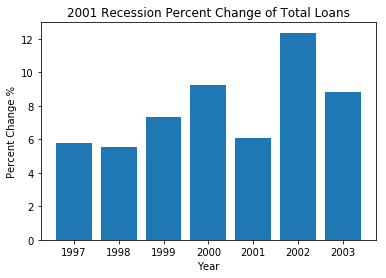

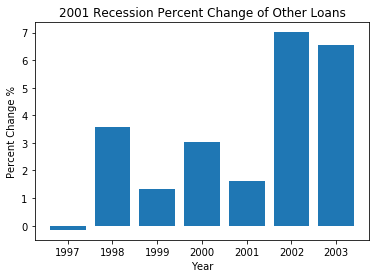

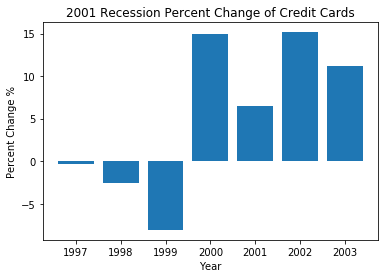

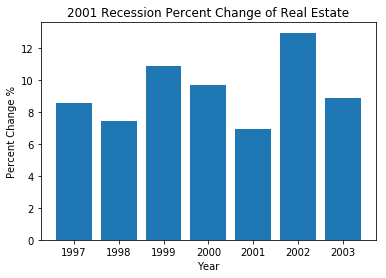

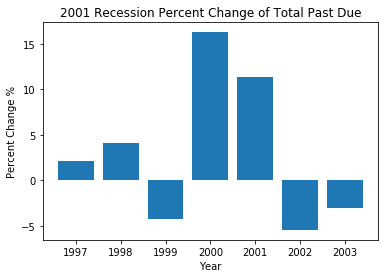

In [62]:
# Loops over function to generate line graph for each plot
for col, val in enumerate(col_names):
    per_bar_plot_01(col_names[col])

In [63]:
def per_bar_plot_09(column_name):
    plt.bar(third_rec_per['Year'],third_rec_per[column_name])
    #plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
    plt.title(f'2009 Recession Percent Change of {column_name}')
    plt.xlabel('Year')
    plt.ylabel('Percent Change %')
    plt.savefig(f'../graphs/per_delta_bar_{column_name}_11.png')
    plt.show()

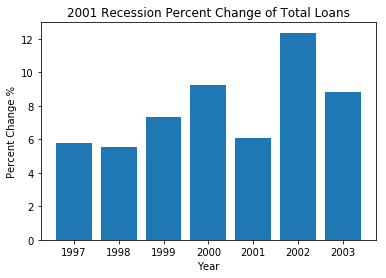

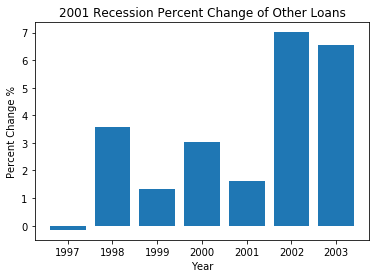

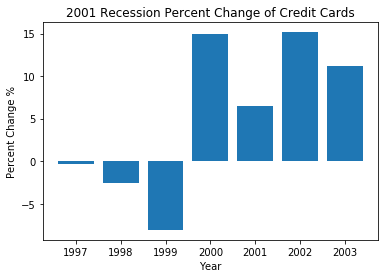

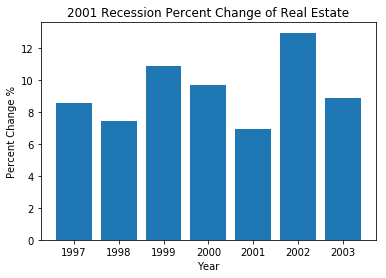

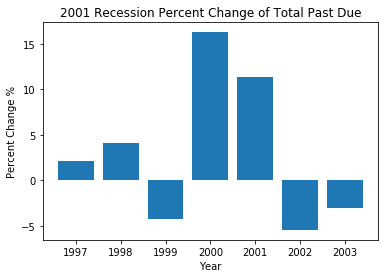

In [64]:
# Loops over function to generate line graph for each plot
for col, val in enumerate(col_names):
    per_bar_plot_01(col_names[col])

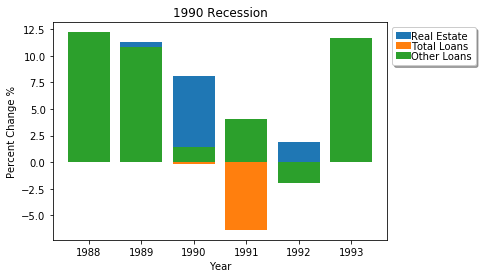

In [66]:
plt.bar(first_rec_per['Year'],first_rec_per['Real Estate'])
plt.bar(first_rec_per['Year'],first_rec_per['Other Loans'])
plt.bar(first_rec_per['Year'],first_rec_per['Credit Cards'])
#plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
plt.legend(['Real Estate', 'Total Loans', 'Other Loans', 'Credit Cards'], loc='best', 
           bbox_to_anchor=[1, 1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.title('1990 Recession')
plt.xlabel('Year')
plt.ylabel('Percent Change %')
plt.savefig('../graphs/per_real_estate_bar_1990.png')
plt.show()

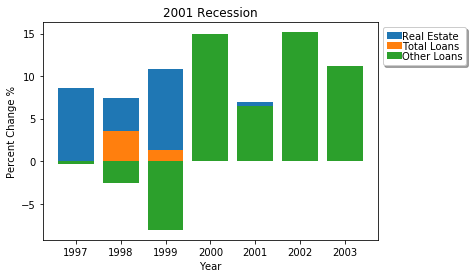

In [67]:
plt.bar(second_rec_per['Year'],second_rec_per['Real Estate'])
plt.bar(second_rec_per['Year'],second_rec_per['Other Loans'])
plt.bar(second_rec_per['Year'],second_rec_per['Credit Cards'])
#plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
plt.legend(['Real Estate', 'Total Loans', 'Other Loans', 'Credit Cards'], loc='best', 
           bbox_to_anchor=[1, 1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.title('2001 Recession')
plt.xlabel('Year')
plt.ylabel('Percent Change %')
plt.savefig(f'../graphs/per_delta_bar_01.png')
plt.show()

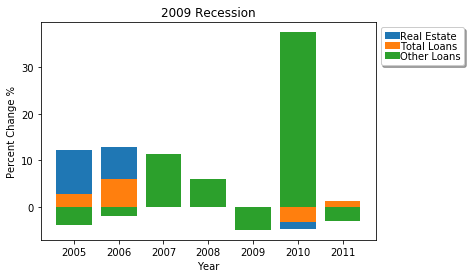

In [68]:
plt.bar(third_rec_per['Year'],third_rec_per['Real Estate'])
plt.bar(third_rec_per['Year'],third_rec_per['Other Loans'])
plt.bar(third_rec_per['Year'],third_rec_per['Credit Cards'])
#plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
plt.legend(['Real Estate', 'Total Loans', 'Other Loans', 'Credit Cards'], loc='best', 
           bbox_to_anchor=[1, 1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.title('2009 Recession')
plt.xlabel('Year')
plt.ylabel('Percent Change %')
plt.savefig(f'../graphs/per_delta_bar_09.png')
plt.show()

In [70]:
frp = first_rec_per
srp = second_rec_per.reset_index(drop = True)
trp = third_rec_per.reset_index(drop = True)



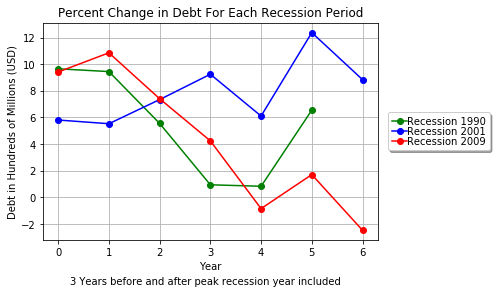

In [71]:
plt.plot(frp['Total Loans'],
        color='green', marker='o', linestyle='solid')
plt.plot(srp['Total Loans'],
        color='blue', marker='o', linestyle='solid')
plt.plot(trp['Total Loans'],
        color='red', marker='o', linestyle='solid')
plt.legend(['Recession 1990', 'Recession 2001', 'Recession 2009'], loc='right', 
           bbox_to_anchor=[1.35, .5], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.grid()
plt.title('Percent Change in Debt For Each Recession Period')
plt.xlabel('Year')
plt.ylabel('Debt in Hundreds of Millions (USD)')
plt.figtext(0.5, -0.03, caption_text, wrap=True, horizontalalignment='center', fontsize=10)
plt.
plt.show()

In [46]:
# Function to create line graph for percent change for each recession
def per_line_plot(column_name):
    plt.plot(frp[column_name],
        color='green', marker='o', linestyle='solid')
    plt.plot(srp[column_name],
        color='blue', marker='o', linestyle='solid')
    plt.plot(trp[column_name],
        color='red', marker='o', linestyle='solid')
    plt.legend(['Recession 1990', 'Recession 2001', 'Recession 2009'], loc='right', 
           bbox_to_anchor=[1.35, .5], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
    plt.grid()
    plt.title(f'Percent Change of {column_name}')
    plt.xlabel('Year')
    plt.ylabel('Percent Change')
    plt.figtext(0.5, -0.03, caption_text, wrap=True, horizontalalignment='center', fontsize=10)
    plt.show()

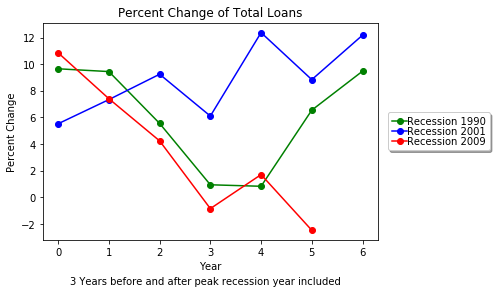

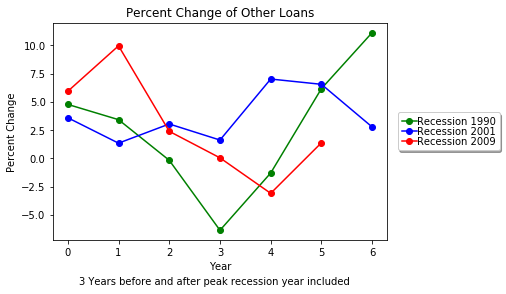

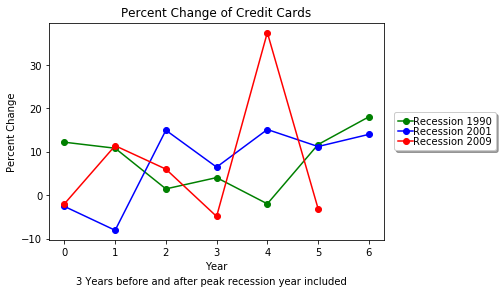

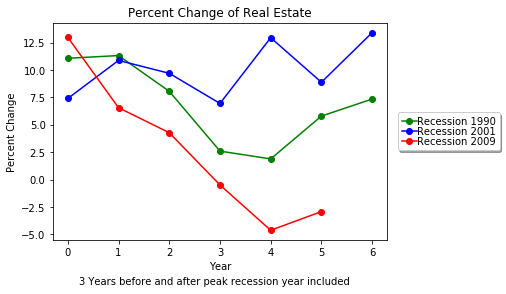

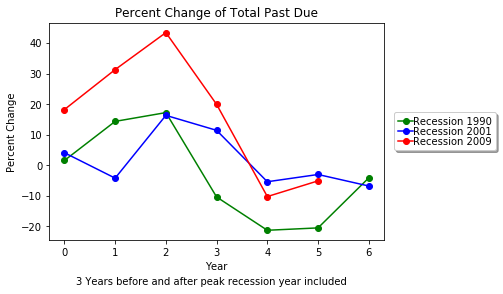

In [60]:
# Loops over function to generate line graph for each plot
for col, val in enumerate(col_names):
    per_line_plot(col_names[col])
